In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define device parameter ranges
lch_range = np.arange(15, 20.1, 0.1)  # Length of channel
tch_range = np.arange(15, 20.1, 0.1)  # Thickness of channel
tox_range = np.arange(1, 2.55, 0.05)  # Thickness of oxide
lsd_range = np.arange(10, 15.1, 0.1)  # Length of source and drain

# Function to simulate device characteristics including ID and VG
def simulate_performance(lch, tch, tox, lsd):
    id_current = (1 / lch) * (tox / tch) * np.exp(-lsd / 10) * random.uniform(0.9, 1.1)
    vg_voltage = (lch / tch) * (tox / lsd) * np.exp(-tox / 2) * random.uniform(0.9, 1.1)
    
    return id_current, vg_voltage

# Generate synthetic dataset
data = []
for lch in lch_range:
    for tch in tch_range:
        for tox in tox_range:
            for lsd in lsd_range:
                id_current, vg_voltage = simulate_performance(lch, tch, tox, lsd)
                data.append([lch, tch, tox, lsd, id_current, vg_voltage])

df = pd.DataFrame(data, columns=['lch', 'tch', 'tox', 'lsd', 'id', 'vg'])

# Save to a CSV file
df.to_csv('synthetic_tfet_data_2.csv', index=False)

# Display the first few rows
df.head()


,lch,tch,tox,lsd,id,vg
0,15.0,15.0,1.0,10.0,0.001584,0.064547
1,15.0,15.0,1.0,10.1,0.001466,0.062403
2,15.0,15.0,1.0,10.2,0.001591,0.054869
3,15.0,15.0,1.0,10.3,0.001452,0.061088
4,15.0,15.0,1.0,10.4,0.001483,0.058706


In [2]:
# Normalize the data
scaler = StandardScaler()
X = df[['lch', 'tch', 'tox', 'lsd']]
X_normalized = scaler.fit_transform(X)
y_id = df['id']
y_vg = df['vg']

# Split into training and testing sets
X_train, X_test, y_train_id, y_test_id = train_test_split(X_normalized, y_id, test_size=0.2, random_state=42)
X_train, X_test, y_train_vg, y_test_vg = train_test_split(X_normalized, y_vg, test_size=0.2, random_state=42)


In [3]:
rfr_id = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=10, random_state=42)
rfr_vg = RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=10, random_state=42)

rfr_id.fit(X_train, y_train_id)
rfr_vg.fit(X_train, y_train_vg)




RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [4]:
# Predict the test set results
y_pred_id = rfr_id.predict(X_test)
y_pred_vg = rfr_vg.predict(X_test)

# Evaluate the ID model
mse_id = mean_squared_error(y_test_id, y_pred_id)
r2_id = r2_score(y_test_id, y_pred_id)

# Evaluate the VG model
mse_vg = mean_squared_error(y_test_vg, y_pred_vg)
r2_vg = r2_score(y_test_vg, y_pred_vg)

print(f'ID (Drain Current) - Mean Squared Error: {mse_id}, R^2 Score: {r2_id}')
print(f'VG (Gate Voltage) - Mean Squared Error: {mse_vg}, R^2 Score: {r2_vg}')


ID (Drain Current) - Mean Squared Error: 1.456148712818686e-08, R^2 Score: 0.9517362318355695
VG (Gate Voltage) - Mean Squared Error: 1.3638323344384647e-05, R^2 Score: 0.8846968091999424


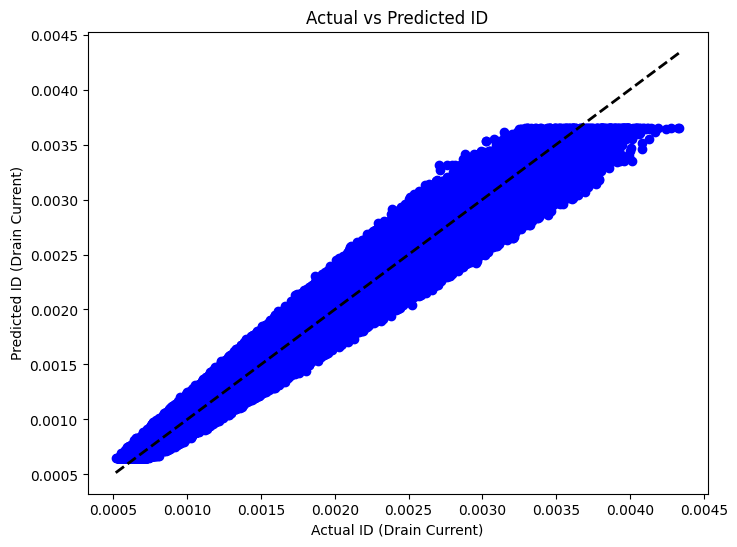

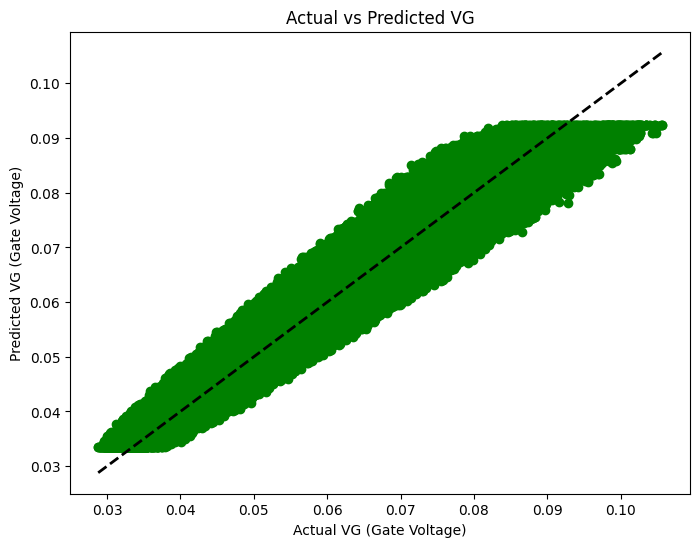

In [5]:
# Plotting the actual vs predicted ID values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_id, y_pred_id, color='blue')
plt.plot([y_test_id.min(), y_test_id.max()], [y_test_id.min(), y_test_id.max()], 'k--', lw=2)
plt.xlabel('Actual ID (Drain Current)')
plt.ylabel('Predicted ID (Drain Current)')
plt.title('Actual vs Predicted ID')
plt.show()

# Plotting the actual vs predicted VG values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_vg, y_pred_vg, color='green')
plt.plot([y_test_vg.min(), y_test_vg.max()], [y_test_vg.min(), y_test_vg.max()], 'k--', lw=2)
plt.xlabel('Actual VG (Gate Voltage)')
plt.ylabel('Predicted VG (Gate Voltage)')
plt.title('Actual vs Predicted VG')
plt.show()


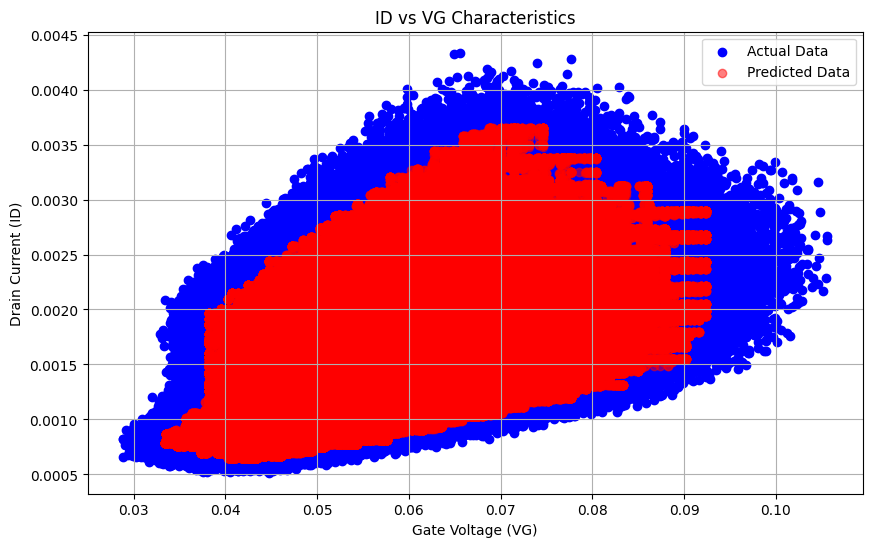

In [6]:
y_pred_id = rfr_id.predict(X_test)
y_pred_vg = rfr_vg.predict(X_test)

# Plotting the ID vs VG graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test_vg, y_test_id, color='blue', label='Actual Data')
plt.scatter(y_pred_vg, y_pred_id, color='red', alpha=0.5, label='Predicted Data')
plt.xlabel('Gate Voltage (VG)')
plt.ylabel('Drain Current (ID)')
plt.title('ID vs VG Characteristics')
plt.legend()
plt.grid(True)
plt.show()